In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import en_nlp_utils

In [2]:
# Define default source path
SRC_PATH = "src/"

In [3]:
# Load dataset
df_review = pd.read_csv(SRC_PATH + "en_hotel_review.csv")

In [4]:
# Check NULL values
en_nlp_utils.check_null(df_review, "df_review")

# Remove rows when "review_cleaned_v1" is NULL
df_review = df_review.dropna(subset=["review_cleaned_v1"]).reset_index(drop=True)

df_review:
source                     0
hotel_id                   0
hotel_name                 0
country                    0
group_name                 0
room_type                  0
stay_length                0
stay_date                  0
review_score               0
review_score_category      0
sentiment                  0
review_date                0
review_title               1
review                     0
review_cleaned_v1        143
dtype: int64
Total rows in df_review: 39974 



## 1) Distribution of review lengths

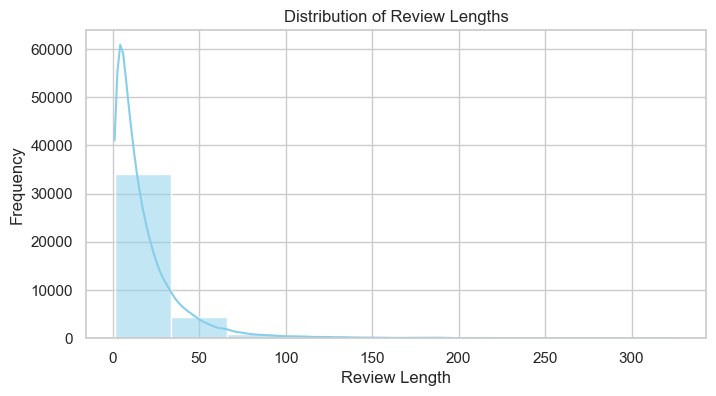

In [5]:
# Set figure style
sns.set(style="whitegrid")

# Split each cleaned review as word token
df_review["review_tokens"] = df_review["review_cleaned_v1"].apply(en_nlp_utils.tokenize_sentence_to_words)

# Calculate the number of words in each review
df_review["word_count"] = df_review["review_tokens"].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(8, 4))
sns.histplot(df_review["word_count"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

## 2) Word Cloud

### b) For all review categories

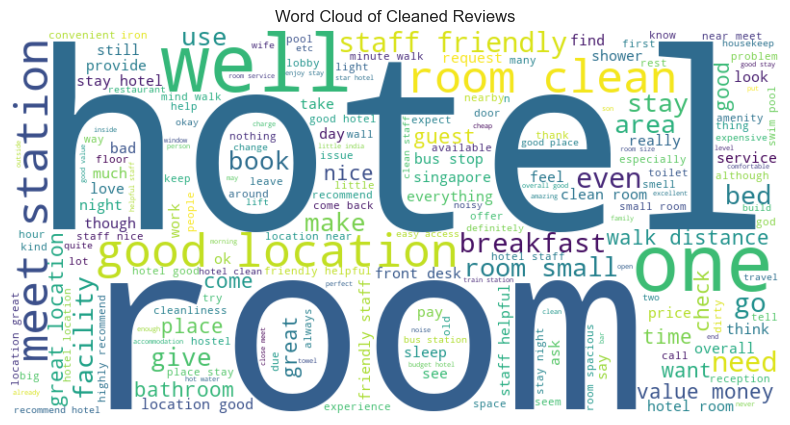

In [6]:
# Concatenate all cleaned reviews into a single string
all_reviews_text = " ".join(df_review["review_cleaned_v1"].dropna())

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Reviews")
plt.show()

### b) By review categories

In [7]:
# Filter reviews by review categories
below_reviews = df_review[df_review["review_score_category"] == "Below Expectation"]
good_reviews = df_review[df_review["review_score_category"] == "Good"]
verygood_reviews = df_review[df_review["review_score_category"] == "Very Good"]
excellent_reviews = df_review[df_review["review_score_category"] == "Excellent"]
exceptional_reviews = df_review[df_review["review_score_category"] == "Exceptional"]

# Concatenate all cleaned reviews into a single string
below_reviews_text = " ".join(below_reviews["review_cleaned_v1"].dropna())
good_reviews_text = " ".join(good_reviews["review_cleaned_v1"].dropna())
verygood_reviews_text = " ".join(verygood_reviews["review_cleaned_v1"].dropna())
excellent_reviews_text = " ".join(excellent_reviews["review_cleaned_v1"].dropna())
exceptional_reviews_text = " ".join(exceptional_reviews["review_cleaned_v1"].dropna())

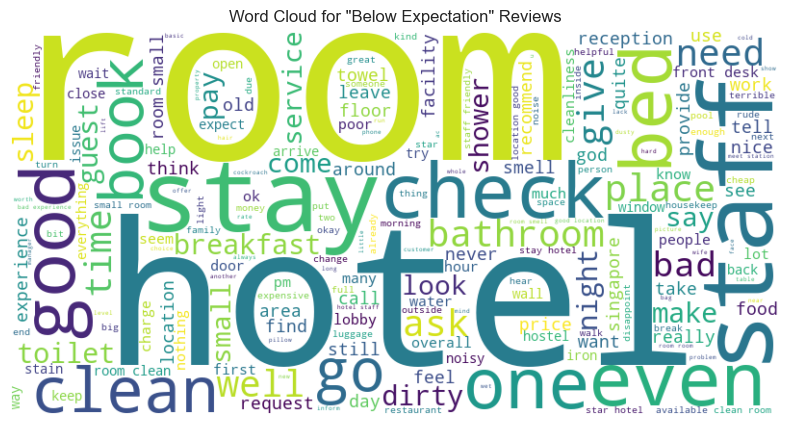

In [8]:
# Generate and display a word cloud for "Below Expectation" Reviews
wordcloud_below = WordCloud(width=800, height=400, background_color="white").generate(below_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_below, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for "Below Expectation" Reviews')
plt.show()

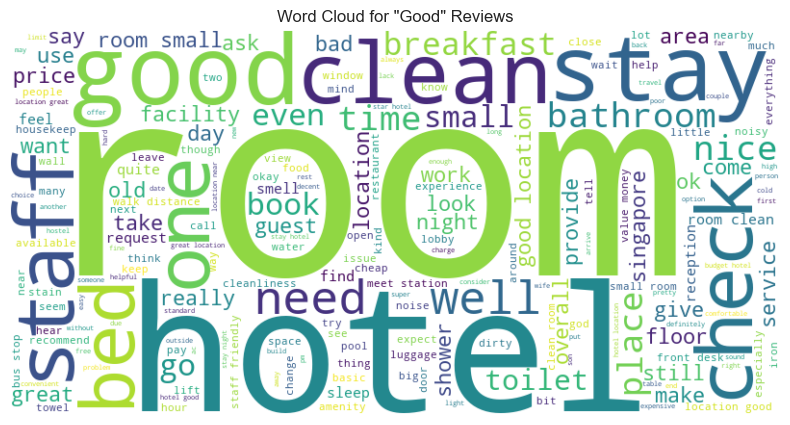

In [9]:
# Generate and display a word cloud for "Good" Reviews
wordcloud_good = WordCloud(width=800, height=400, background_color="white").generate(good_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_good, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for "Good" Reviews')
plt.show()

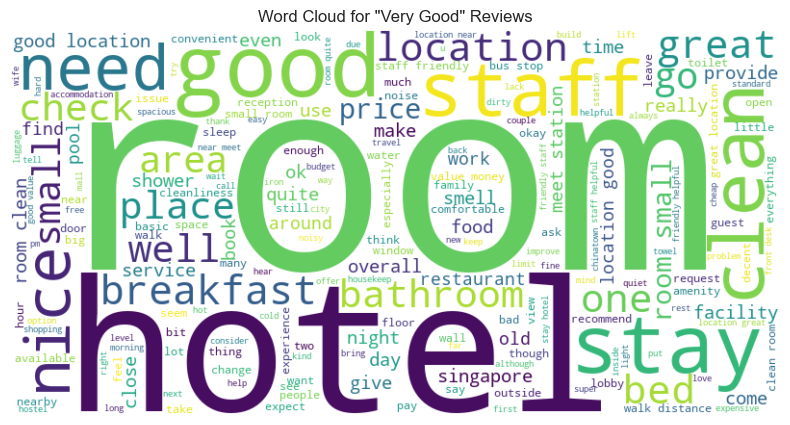

In [10]:
# Generate and display a word cloud for "Very Good" Reviews
wordcloud_verygood = WordCloud(width=800, height=400, background_color="white").generate(verygood_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_verygood, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for "Very Good" Reviews')
plt.show()

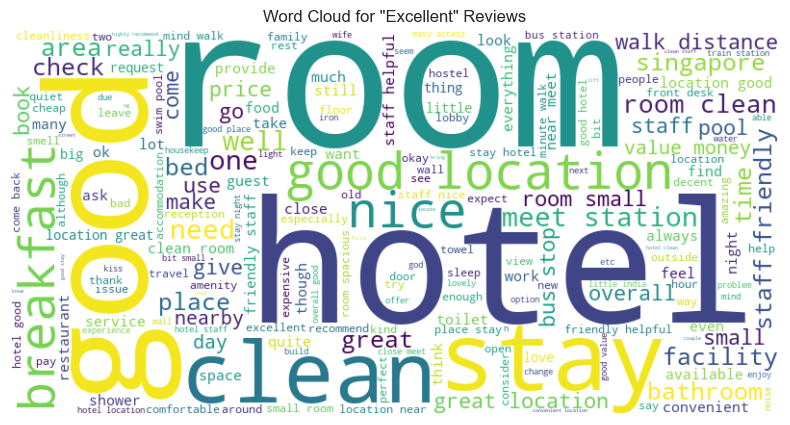

In [11]:
# Generate and display a word cloud for "Excellent" Reviews
wordcloud_excellent = WordCloud(width=800, height=400, background_color="white").generate(excellent_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_excellent, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for "Excellent" Reviews')
plt.show()

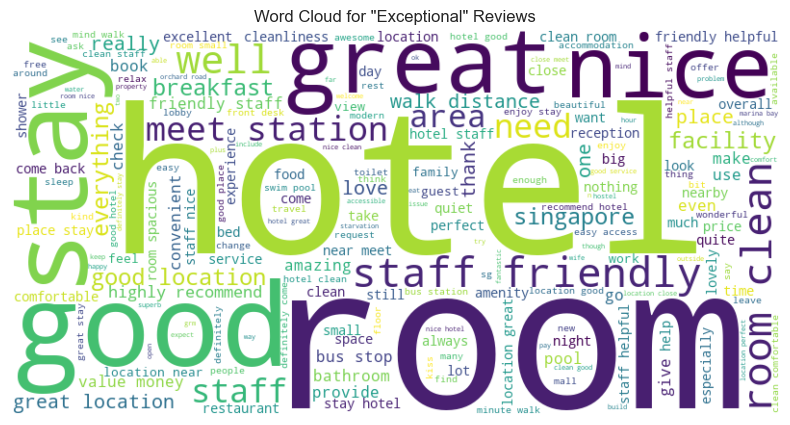

In [12]:
# Generate and display a word cloud for "Exceptional" Reviews
wordcloud_exceptional = WordCloud(width=800, height=400, background_color="white").generate(exceptional_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_exceptional, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for "Exceptional" Reviews')
plt.show()